# PD1–TCR Proteomics Analysis (Jurkat) 

This notebook uses the **pipeline** that preserves protein/gene annotations and
exports annotated log2FC tables, top lists, and an Excel workbook.  
Put data files in the project root or `data/`:

- `tp reordered (1).xlsx`
- `meta_data (1).csv`

In [1]:

# Paths
from pathlib import Path
import pandas as pd
import numpy as np

PROT_XLSX = Path("tp reordered (1).xlsx") if Path("tp reordered (1).xlsx").exists() else Path("data") / "tp reordered (1).xlsx"
META_CSV  = Path("meta_data (1).csv")      if Path("meta_data (1).csv").exists()      else Path("data") / "meta_data (1).csv"
OUTDIR    = Path("outputs")
OUTDIR.mkdir(parents=True, exist_ok=True)

PROT_XLSX, META_CSV, OUTDIR


(WindowsPath('data/tp reordered (1).xlsx'),
 WindowsPath('data/meta_data (1).csv'),
 WindowsPath('outputs'))

In [2]:
# Import the updated pipeline (uses USER_COL_CONFIG inside the .py file)
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(".")


from PD1_TCR_proteomics_pipeline import (
    USER_COL_CONFIG, load_proteomics_excel, run_pipeline
)

# Optional sanity check: list available sheet names before loading
sheets = pd.ExcelFile(PROT_XLSX, engine="openpyxl").sheet_names
print("Available sheets:", sheets)
print("Configured sheet_name:", USER_COL_CONFIG.get("sheet_name"))



Available sheets: ['LFQs_renamed_reorderd-2']
Configured sheet_name: LFQs_renamed_reorderd-2


In [3]:

# Load once to inspect headers after basic cleaning & renaming of annotations
df = load_proteomics_excel(PROT_XLSX)
print("Total columns:", len(df.columns))

# Check that every condition column in USER_COL_CONFIG exists in the sheet
cond_map = USER_COL_CONFIG.get("condition_map", {})
missing = [c for c in cond_map if c not in df.columns]
present = [c for c in cond_map if c in df.columns]
print("Condition columns present:", len(present))
if missing:
    print("[WARN] Missing condition columns, check spelling/casing:")
    for m in missing: print("  -", m)

# Peek first 30 headers to visually confirm
df.columns.tolist()[:30]


[loader] Using sheet: LFQs_renamed_reorderd-2
Total columns: 122
Condition columns present: 14


['Protein',
 'Protein ID',
 'Entry Name',
 'Gene',
 'Protein Length',
 'Organism',
 'Protein Existence',
 'Protein name',
 'Protein Probability',
 'Top Peptide Probability',
 'PD1 reporter unstimulated',
 '230801kw_MKreileder_ProtA1_S3_A2_1_15848 MaxLFQ Intensity',
 '230801kw_MKreileder_ProtB1_S3_B3_1_15861 MaxLFQ Intensity',
 '230801kw_MKreileder_ProtB1_S3_B4_1_15862 MaxLFQ Intensity',
 '230801kw_MKreileder_ProtC1_S3_A5_1_15888 MaxLFQ Intensity',
 '230801kw_MKreileder_ProtC1_S3_A6_1_15889 MaxLFQ Intensity',
 '230801kw_MKreileder_ProtD1_S3_B7_1_15902 MaxLFQ Intensity',
 '230801kw_MKreileder_ProtD1_S3_B8_1_15903 MaxLFQ Intensity',
 'PD-1 reporter TCS Ctrl 5min',
 '230801kw_MKreileder_ProtA2_S3_A9_1_15916 MaxLFQ Intensity',
 '230801kw_MKreileder_ProtB2_S3_B11_1_15930 MaxLFQ Intensity',
 '230801kw_MKreileder_ProtB2_S3_B12_1_15931 MaxLFQ Intensity',
 '230801kw_MKreileder_ProtC2_S3_B1_1_15944 MaxLFQ Intensity',
 '230801kw_MKreileder_ProtC2_S3_B2_1_15945 MaxLFQ Intensity',
 '230801kw_MKreile

[loader] Using sheet: LFQs_renamed_reorderd-2


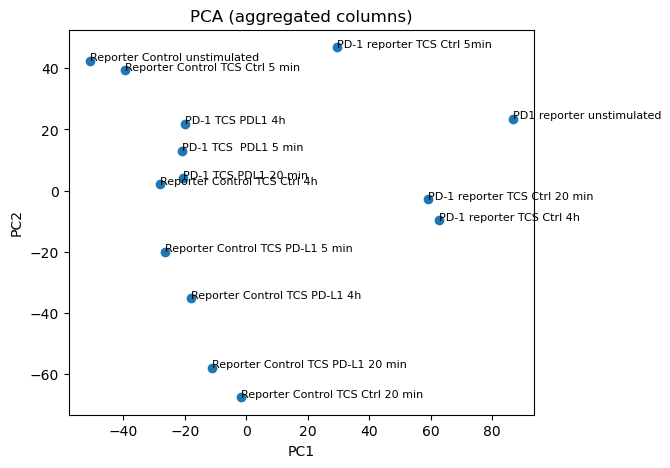

E:\25-26 summer\research\project\PD1_TCR_proteomics_pipeline.py:454: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
2025-08-16 23:00:48,264 [WARNING] Input library not found: Reactome_2016. Skip


[enrich] skip 0 min UP Reactome_2016: No GeneSets are valid !!! Check your gene_sets input.


2025-08-16 23:00:54,319 [WARNING] Input library not found: Reactome_2016. Skip


[enrich] skip 0 min DOWN Reactome_2016: No GeneSets are valid !!! Check your gene_sets input.


2025-08-16 23:01:00,273 [WARNING] Input library not found: Reactome_2016. Skip


[enrich] skip 20 min UP Reactome_2016: No GeneSets are valid !!! Check your gene_sets input.


2025-08-16 23:01:06,383 [WARNING] Input library not found: Reactome_2016. Skip


[enrich] skip 20 min DOWN Reactome_2016: No GeneSets are valid !!! Check your gene_sets input.


2025-08-16 23:01:12,712 [WARNING] Input library not found: Reactome_2016. Skip


[enrich] skip 4 h UP Reactome_2016: No GeneSets are valid !!! Check your gene_sets input.


2025-08-16 23:01:18,811 [WARNING] Input library not found: Reactome_2016. Skip


[enrich] skip 4 h DOWN Reactome_2016: No GeneSets are valid !!! Check your gene_sets input.


2025-08-16 23:01:24,951 [WARNING] Input library not found: Reactome_2016. Skip


[enrich] skip 5 min UP Reactome_2016: No GeneSets are valid !!! Check your gene_sets input.


2025-08-16 23:01:31,033 [WARNING] Input library not found: Reactome_2016. Skip


[enrich] skip 5 min DOWN Reactome_2016: No GeneSets are valid !!! Check your gene_sets input.
Pipeline finished in [aggregated] mode. Outputs written to: outputs


In [4]:
# Run the full pipeline. Outputs go to /outputs
run_pipeline(PROT_XLSX, META_CSV, OUTDIR, max_missing_frac=0.5)


In [5]:
import os, pandas as pd
sorted(os.listdir(OUTDIR))

fc = pd.read_csv(OUTDIR / "aggregated_log2FC_by_time.csv")
print(fc.columns.tolist()[:20])  # should include "Protein ID"/"Entry"/"Gene"/"Protein name" etc.
fc.head(10)


['Protein ID', 'Entry Name', 'Gene', 'Protein', 'Protein name', 'Protein Length', 'Organism', 'Protein Existence', 'Protein Probability', 'Top Peptide Probability', 'PD1', 'CTRL', 'log2FC_PD1_vs_CTRL', 'time']


,Protein ID,Entry Name,Gene,Protein,Protein name,Protein Length,Organism,Protein Existence,Protein Probability,Top Peptide Probability,PD1,CTRL,log2FC_PD1_vs_CTRL,time
0,A0A075B767,PAL4H_HUMAN,PPIAL4H,sp|A0A075B767|PAL4H_HUMAN,Peptidyl-prolyl cis-trans isomerase A-like 4H,164,Homo sapiens,3:Protein inferred from homology,0.9946,0.9990,0.000000,0.000000,0.000000,0 min
1,A0A0B4J2A2,PAL4C_HUMAN,PPIAL4C,sp|A0A0B4J2A2|PAL4C_HUMAN,Peptidyl-prolyl cis-trans isomerase A-like 4C,164,Homo sapiens,2:Experimental evidence at transcript level,1.0000,0.9990,0.000000,0.000000,0.000000,0 min
2,A0A0B4J2D5,GAL3B_HUMAN,GATD3B,sp|A0A0B4J2D5|GAL3B_HUMAN,Putative glutamine amidotransferase-like class...,268,Homo sapiens,5:Protein uncertain,1.0000,0.9990,16.698959,15.300940,1.398020,0 min
3,A0A0B4J2E0,TVBL4_HUMAN,TRBV12-4,sp|A0A0B4J2E0|TVBL4_HUMAN,T cell receptor beta variable 12-4,115,Homo sapiens,1:Experimental evidence at protein level,0.9944,0.9990,14.221496,14.900199,-0.678704,0 min
4,A0A0U1RRE5,NBDY_HUMAN,NBDY,sp|A0A0U1RRE5|NBDY_HUMAN,Negative regulator of P-body association,68,Homo sapiens,1:Experimental evidence at protein level,0.9996,0.9990,15.854165,0.000000,15.854165,0 min
5,A0A2R8Y619,H2BK1_HUMAN,H2BK1,sp|A0A2R8Y619|H2BK1_HUMAN,Histone H2B type 2-K1,122,Homo sapiens,3:Protein inferred from homology,0.9980,0.9989,0.000000,0.000000,0.000000,0 min
6,A0A5B9,TRBC2_HUMAN,TRBC2,sp|A0A5B9|TRBC2_HUMAN,T cell receptor beta constant 2,178,Homo sapiens,1:Experimental evidence at protein level,0.9719,0.9990,0.000000,13.755239,-13.755239,0 min
7,A0AVT1,UBA6_HUMAN,UBA6,sp|A0AVT1|UBA6_HUMAN,Ubiquitin-like modifier-activating enzyme 6,1052,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,16.630053,16.735662,-0.105609,0 min
8,A0JLT2,MED19_HUMAN,MED19,sp|A0JLT2|MED19_HUMAN,Mediator of RNA polymerase II transcription su...,244,Homo sapiens,1:Experimental evidence at protein level,0.9937,0.9990,0.000000,0.000000,0.000000,0 min
9,A0JNW5,BLT3B_HUMAN,BLTP3B,sp|A0JNW5|BLT3B_HUMAN,Bridge-like lipid transfer protein family memb...,1464,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9989,0.000000,11.793832,-11.793832,0 min


In [6]:

def show_top(time_label, k=10):
    t = time_label.replace(" ", "_")
    up = pd.read_csv(OUTDIR / f"top_up_{t}.csv")
    dn = pd.read_csv(OUTDIR / f"top_down_{t}.csv")
    display(f"Top {k} UP — {time_label}", up.head(k))
    display(f"Top {k} DOWN — {time_label}", dn.head(k))

for tl in ["0 min","5 min","20 min","4 h"]:
    try:
        show_top(tl, k=15)
    except FileNotFoundError:
        pass


'Top 15 UP — 0 min'

,Protein ID,Entry Name,Gene,Protein,Protein name,Protein Length,Organism,Protein Existence,Protein Probability,Top Peptide Probability,PD1,CTRL,log2FC_PD1_vs_CTRL,time
0,Q9UBI1,COMD3_HUMAN,COMMD3,sp|Q9UBI1|COMD3_HUMAN,COMM domain-containing protein 3,195,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.999,19.255025,0.0,19.255025,0 min
1,Q9H9Y4,GPN2_HUMAN,GPN2,sp|Q9H9Y4|GPN2_HUMAN,GPN-loop GTPase 2,310,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.999,19.000895,0.0,19.000895,0 min
2,P78417,GSTO1_HUMAN,GSTO1,sp|P78417|GSTO1_HUMAN,Glutathione S-transferase omega-1,241,Homo sapiens,1:Experimental evidence at protein level,0.9998,0.999,18.405964,0.0,18.405964,0 min
3,P60059,SC61G_HUMAN,SEC61G,sp|P60059|SC61G_HUMAN,Protein transport protein Sec61 subunit gamma,68,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.999,17.840915,0.0,17.840915,0 min
4,P61960,UFM1_HUMAN,UFM1,sp|P61960|UFM1_HUMAN,Ubiquitin-fold modifier 1,85,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.999,17.123370,0.0,17.123370,0 min
5,Q99622,C10_HUMAN,C12orf57,sp|Q99622|C10_HUMAN,Protein C10,126,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.999,17.072023,0.0,17.072023,0 min
6,P14406,CX7A2_HUMAN,COX7A2,sp|P14406|CX7A2_HUMAN,"Cytochrome c oxidase subunit 7A2, mitochondrial",83,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.999,17.068765,0.0,17.068765,0 min
7,P29218,IMPA1_HUMAN,IMPA1,sp|P29218|IMPA1_HUMAN,Inositol monophosphatase 1,277,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.999,17.012920,0.0,17.012920,0 min
8,Q9UHY1,NRBP_HUMAN,NRBP1,sp|Q9UHY1|NRBP_HUMAN,Nuclear receptor-binding protein,535,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.999,16.920231,0.0,16.920231,0 min
9,Q9Y248,PSF2_HUMAN,GINS2,sp|Q9Y248|PSF2_HUMAN,DNA replication complex GINS protein PSF2,185,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.999,16.870010,0.0,16.870010,0 min


'Top 15 DOWN — 0 min'

,Protein ID,Entry Name,Gene,Protein,Protein name,Protein Length,Organism,Protein Existence,Protein Probability,Top Peptide Probability,PD1,CTRL,log2FC_PD1_vs_CTRL,time
0,A6NC98,CC88B_HUMAN,CCDC88B,sp|A6NC98|CC88B_HUMAN,Coiled-coil domain-containing protein 88B,1476,Homo sapiens,1:Experimental evidence at protein level,1.0,0.9979,0.0,18.551165,-18.551165,0 min
1,P35222,CTNB1_HUMAN,CTNNB1,sp|P35222|CTNB1_HUMAN,Catenin beta-1,781,Homo sapiens,1:Experimental evidence at protein level,1.0,0.9990,0.0,17.925459,-17.925459,0 min
2,Q01804,OTUD4_HUMAN,OTUD4,sp|Q01804|OTUD4_HUMAN,OTU domain-containing protein 4,1114,Homo sapiens,1:Experimental evidence at protein level,1.0,0.9990,0.0,17.579928,-17.579928,0 min
3,Q86TU7,SETD3_HUMAN,SETD3,sp|Q86TU7|SETD3_HUMAN,Actin-histidine N-methyltransferase,594,Homo sapiens,1:Experimental evidence at protein level,1.0,0.9990,0.0,17.342291,-17.342291,0 min
4,Q86WW8,COA5_HUMAN,COA5,sp|Q86WW8|COA5_HUMAN,Cytochrome c oxidase assembly factor 5,74,Homo sapiens,1:Experimental evidence at protein level,1.0,0.9990,0.0,17.277282,-17.277282,0 min
5,O43237,DC1L2_HUMAN,DYNC1LI2,sp|O43237|DC1L2_HUMAN,Cytoplasmic dynein 1 light intermediate chain 2,492,Homo sapiens,1:Experimental evidence at protein level,1.0,0.9990,0.0,17.018408,-17.018408,0 min
6,P80404,GABT_HUMAN,ABAT,sp|P80404|GABT_HUMAN,"4-aminobutyrate aminotransferase, mitochondrial",500,Homo sapiens,1:Experimental evidence at protein level,1.0,0.9990,0.0,16.886044,-16.886044,0 min
7,Q9UDT6,CLIP2_HUMAN,CLIP2,sp|Q9UDT6|CLIP2_HUMAN,CAP-Gly domain-containing linker protein 2,1046,Homo sapiens,1:Experimental evidence at protein level,1.0,0.9990,0.0,16.742571,-16.742571,0 min
8,P42356,PI4KA_HUMAN,PI4KA,sp|P42356|PI4KA_HUMAN,Phosphatidylinositol 4-kinase alpha,2102,Homo sapiens,1:Experimental evidence at protein level,1.0,0.9990,0.0,16.570830,-16.570830,0 min
9,Q03188,CENPC_HUMAN,CENPC,sp|Q03188|CENPC_HUMAN,Centromere protein C,943,Homo sapiens,1:Experimental evidence at protein level,1.0,0.9990,0.0,16.496529,-16.496529,0 min


'Top 15 UP — 5 min'

,Protein ID,Entry Name,Gene,Protein,Protein name,Protein Length,Organism,Protein Existence,Protein Probability,Top Peptide Probability,PD1,CTRL,log2FC_PD1_vs_CTRL,time
0,P80404,GABT_HUMAN,ABAT,sp|P80404|GABT_HUMAN,"4-aminobutyrate aminotransferase, mitochondrial",500,Homo sapiens,1:Experimental evidence at protein level,1.0,0.999,17.904312,0.0,17.904312,5 min
1,Q15116,PDCD1_HUMAN,PDCD1,sp|Q15116|PDCD1_HUMAN,Programmed cell death protein 1,288,Homo sapiens,1:Experimental evidence at protein level,1.0,0.999,16.736214,0.0,16.736214,5 min
2,Q9H936,GHC1_HUMAN,SLC25A22,sp|Q9H936|GHC1_HUMAN,Mitochondrial glutamate carrier 1,323,Homo sapiens,1:Experimental evidence at protein level,1.0,0.999,16.618313,0.0,16.618313,5 min
3,P54652,HSP72_HUMAN,HSPA2,sp|P54652|HSP72_HUMAN,Heat shock-related 70 kDa protein 2,639,Homo sapiens,1:Experimental evidence at protein level,1.0,0.999,16.495260,0.0,16.495260,5 min
4,O43903,GAS2_HUMAN,GAS2,sp|O43903|GAS2_HUMAN,Growth arrest-specific protein 2,313,Homo sapiens,1:Experimental evidence at protein level,1.0,0.999,15.520785,0.0,15.520785,5 min
5,Q96D05,F241B_HUMAN,FAM241B,sp|Q96D05|F241B_HUMAN,Protein FAM241B,121,Homo sapiens,1:Experimental evidence at protein level,1.0,0.999,15.120734,0.0,15.120734,5 min
6,Q8WW33,GTSF1_HUMAN,GTSF1,sp|Q8WW33|GTSF1_HUMAN,Gametocyte-specific factor 1,167,Homo sapiens,1:Experimental evidence at protein level,1.0,0.999,14.995191,0.0,14.995191,5 min
7,Q12846,STX4_HUMAN,STX4,sp|Q12846|STX4_HUMAN,Syntaxin-4,297,Homo sapiens,1:Experimental evidence at protein level,1.0,0.999,14.948548,0.0,14.948548,5 min
8,P61964,WDR5_HUMAN,WDR5,sp|P61964|WDR5_HUMAN,WD repeat-containing protein 5,334,Homo sapiens,1:Experimental evidence at protein level,1.0,0.999,14.871915,0.0,14.871915,5 min
9,P12829,MYL4_HUMAN,MYL4,sp|P12829|MYL4_HUMAN,Myosin light chain 4,197,Homo sapiens,1:Experimental evidence at protein level,1.0,0.999,14.821075,0.0,14.821075,5 min


'Top 15 DOWN — 5 min'

,Protein ID,Entry Name,Gene,Protein,Protein name,Protein Length,Organism,Protein Existence,Protein Probability,Top Peptide Probability,PD1,CTRL,log2FC_PD1_vs_CTRL,time
0,P32019,I5P2_HUMAN,INPP5B,sp|P32019|I5P2_HUMAN,"Type II inositol 1,4,5-trisphosphate 5-phospha...",993,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,0.0,16.153306,-16.153306,5 min
1,Q6P444,MTFR2_HUMAN,MTFR2,sp|Q6P444|MTFR2_HUMAN,Mitochondrial fission regulator 2,385,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,0.0,15.705079,-15.705079,5 min
2,P50225,ST1A1_HUMAN,SULT1A1,sp|P50225|ST1A1_HUMAN,Sulfotransferase 1A1,295,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,0.0,15.676701,-15.676701,5 min
3,P51817,PRKX_HUMAN,PRKX,sp|P51817|PRKX_HUMAN,cAMP-dependent protein kinase catalytic subuni...,358,Homo sapiens,1:Experimental evidence at protein level,0.9998,0.9990,0.0,15.651983,-15.651983,5 min
4,Q7L273,KCTD9_HUMAN,KCTD9,sp|Q7L273|KCTD9_HUMAN,BTB/POZ domain-containing protein KCTD9,389,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,0.0,15.571596,-15.571596,5 min
5,Q15223,NECT1_HUMAN,NECTIN1,sp|Q15223|NECT1_HUMAN,Nectin-1,517,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,0.0,15.505839,-15.505839,5 min
6,Q8TB36,GDAP1_HUMAN,GDAP1,sp|Q8TB36|GDAP1_HUMAN,Ganglioside-induced differentiation-associated...,358,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,0.0,15.338751,-15.338751,5 min
7,O00189,AP4M1_HUMAN,AP4M1,sp|O00189|AP4M1_HUMAN,AP-4 complex subunit mu-1,453,Homo sapiens,1:Experimental evidence at protein level,0.9994,0.9984,0.0,15.312329,-15.312329,5 min
8,O94830,DDHD2_HUMAN,DDHD2,sp|O94830|DDHD2_HUMAN,Phospholipase DDHD2,711,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,0.0,15.213809,-15.213809,5 min
9,Q9NP92,RT30_HUMAN,MRPS30,sp|Q9NP92|RT30_HUMAN,"39S ribosomal protein S30, mitochondrial",439,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,0.0,15.211371,-15.211371,5 min


'Top 15 UP — 20 min'

,Protein ID,Entry Name,Gene,Protein,Protein name,Protein Length,Organism,Protein Existence,Protein Probability,Top Peptide Probability,PD1,CTRL,log2FC_PD1_vs_CTRL,time
0,Q15116,PDCD1_HUMAN,PDCD1,sp|Q15116|PDCD1_HUMAN,Programmed cell death protein 1,288,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,16.932795,0.0,16.932795,20 min
1,Q9H936,GHC1_HUMAN,SLC25A22,sp|Q9H936|GHC1_HUMAN,Mitochondrial glutamate carrier 1,323,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,16.430903,0.0,16.430903,20 min
2,O75496,GEMI_HUMAN,GMNN,sp|O75496|GEMI_HUMAN,Geminin,209,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,16.236014,0.0,16.236014,20 min
3,Q15056,IF4H_HUMAN,EIF4H,sp|Q15056|IF4H_HUMAN,Eukaryotic translation initiation factor 4H,248,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,15.870381,0.0,15.870381,20 min
4,Q53S33,BOLA3_HUMAN,BOLA3,sp|Q53S33|BOLA3_HUMAN,BolA-like protein 3,107,Homo sapiens,1:Experimental evidence at protein level,0.9999,0.9990,15.612680,0.0,15.612680,20 min
5,Q9P0N9,TBCD7_HUMAN,TBC1D7,sp|Q9P0N9|TBCD7_HUMAN,TBC1 domain family member 7,293,Homo sapiens,1:Experimental evidence at protein level,0.9999,0.9990,15.503846,0.0,15.503846,20 min
6,Q9UBS0,KS6B2_HUMAN,RPS6KB2,sp|Q9UBS0|KS6B2_HUMAN,Ribosomal protein S6 kinase beta-2,482,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,15.257584,0.0,15.257584,20 min
7,Q5PRF9,SMAG2_HUMAN,SAMD4B,sp|Q5PRF9|SMAG2_HUMAN,Protein Smaug homolog 2,694,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,15.245939,0.0,15.245939,20 min
8,Q9Y6W5,WASF2_HUMAN,WASF2,sp|Q9Y6W5|WASF2_HUMAN,Actin-binding protein WASF2,498,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,15.229406,0.0,15.229406,20 min
9,Q00266,METK1_HUMAN,MAT1A,sp|Q00266|METK1_HUMAN,S-adenosylmethionine synthase isoform type-1,395,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,15.132818,0.0,15.132818,20 min


'Top 15 DOWN — 20 min'

,Protein ID,Entry Name,Gene,Protein,Protein name,Protein Length,Organism,Protein Existence,Protein Probability,Top Peptide Probability,PD1,CTRL,log2FC_PD1_vs_CTRL,time
0,O60518,RNBP6_HUMAN,RANBP6,sp|O60518|RNBP6_HUMAN,Ran-binding protein 6,1105,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,0.0,16.733635,-16.733635,20 min
1,Q9HB19,PKHA2_HUMAN,PLEKHA2,sp|Q9HB19|PKHA2_HUMAN,Pleckstrin homology domain-containing family A...,425,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,0.0,16.729744,-16.729744,20 min
2,P27482,CALL3_HUMAN,CALML3,sp|P27482|CALL3_HUMAN,Calmodulin-like protein 3,149,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9988,0.0,16.677412,-16.677412,20 min
3,O43181,NDUS4_HUMAN,NDUFS4,sp|O43181|NDUS4_HUMAN,NADH dehydrogenase [ubiquinone] iron-sulfur pr...,175,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,0.0,16.645572,-16.645572,20 min
4,Q14671,PUM1_HUMAN,PUM1,sp|Q14671|PUM1_HUMAN,Pumilio homolog 1,1186,Homo sapiens,1:Experimental evidence at protein level,0.9996,0.9986,0.0,16.483229,-16.483229,20 min
5,Q8WTW3,COG1_HUMAN,COG1,sp|Q8WTW3|COG1_HUMAN,Conserved oligomeric Golgi complex subunit 1,980,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,0.0,16.335540,-16.335540,20 min
6,Q8IYU8,MICU2_HUMAN,MICU2,sp|Q8IYU8|MICU2_HUMAN,"Calcium uptake protein 2, mitochondrial",434,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,0.0,16.116578,-16.116578,20 min
7,Q8TB36,GDAP1_HUMAN,GDAP1,sp|Q8TB36|GDAP1_HUMAN,Ganglioside-induced differentiation-associated...,358,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,0.0,15.988958,-15.988958,20 min
8,P00846,ATP6_HUMAN,MT-ATP6,sp|P00846|ATP6_HUMAN,ATP synthase subunit a,226,Homo sapiens,1:Experimental evidence at protein level,0.9319,0.9990,0.0,15.984387,-15.984387,20 min
9,Q9Y5U9,IR3IP_HUMAN,IER3IP1,sp|Q9Y5U9|IR3IP_HUMAN,Immediate early response 3-interacting protein 1,82,Homo sapiens,1:Experimental evidence at protein level,0.9965,0.9990,0.0,15.959945,-15.959945,20 min


'Top 15 UP — 4 h'

,Protein ID,Entry Name,Gene,Protein,Protein name,Protein Length,Organism,Protein Existence,Protein Probability,Top Peptide Probability,PD1,CTRL,log2FC_PD1_vs_CTRL,time
0,Q15116,PDCD1_HUMAN,PDCD1,sp|Q15116|PDCD1_HUMAN,Programmed cell death protein 1,288,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,16.980727,0.0,16.980727,4 h
1,Q99633,PRP18_HUMAN,PRPF18,sp|Q99633|PRP18_HUMAN,Pre-mRNA-splicing factor 18,342,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,16.135856,0.0,16.135856,4 h
2,Q15056,IF4H_HUMAN,EIF4H,sp|Q15056|IF4H_HUMAN,Eukaryotic translation initiation factor 4H,248,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,15.869522,0.0,15.869522,4 h
3,O43903,GAS2_HUMAN,GAS2,sp|O43903|GAS2_HUMAN,Growth arrest-specific protein 2,313,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,15.480212,0.0,15.480212,4 h
4,Q8N300,SVBP_HUMAN,SVBP,sp|Q8N300|SVBP_HUMAN,Small vasohibin-binding protein,66,Homo sapiens,1:Experimental evidence at protein level,0.9998,0.9990,15.240825,0.0,15.240825,4 h
5,Q00266,METK1_HUMAN,MAT1A,sp|Q00266|METK1_HUMAN,S-adenosylmethionine synthase isoform type-1,395,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,15.136832,0.0,15.136832,4 h
6,Q9BVI0,PHF20_HUMAN,PHF20,sp|Q9BVI0|PHF20_HUMAN,PHD finger protein 20,1012,Homo sapiens,1:Experimental evidence at protein level,0.9958,0.9983,15.036664,0.0,15.036664,4 h
7,P30281,CCND3_HUMAN,CCND3,sp|P30281|CCND3_HUMAN,G1/S-specific cyclin-D3,292,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,14.997021,0.0,14.997021,4 h
8,P40818,UBP8_HUMAN,USP8,sp|P40818|UBP8_HUMAN,Ubiquitin carboxyl-terminal hydrolase 8,1118,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,14.790268,0.0,14.790268,4 h
9,Q14997,PSME4_HUMAN,PSME4,sp|Q14997|PSME4_HUMAN,Proteasome activator complex subunit 4,1843,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,14.629620,0.0,14.629620,4 h


'Top 15 DOWN — 4 h'

,Protein ID,Entry Name,Gene,Protein,Protein name,Protein Length,Organism,Protein Existence,Protein Probability,Top Peptide Probability,PD1,CTRL,log2FC_PD1_vs_CTRL,time
0,P35222,CTNB1_HUMAN,CTNNB1,sp|P35222|CTNB1_HUMAN,Catenin beta-1,781,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,0.0,17.652881,-17.652881,4 h
1,Q6P444,MTFR2_HUMAN,MTFR2,sp|Q6P444|MTFR2_HUMAN,Mitochondrial fission regulator 2,385,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,0.0,16.979556,-16.979556,4 h
2,Q7Z6I8,CE024_HUMAN,C5orf24,sp|Q7Z6I8|CE024_HUMAN,UPF0461 protein C5orf24,188,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,0.0,16.717610,-16.717610,4 h
3,P27482,CALL3_HUMAN,CALML3,sp|P27482|CALL3_HUMAN,Calmodulin-like protein 3,149,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9988,0.0,16.329372,-16.329372,4 h
4,P20290,BTF3_HUMAN,BTF3,sp|P20290|BTF3_HUMAN,Transcription factor BTF3,206,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,0.0,16.311337,-16.311337,4 h
5,P50225,ST1A1_HUMAN,SULT1A1,sp|P50225|ST1A1_HUMAN,Sulfotransferase 1A1,295,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,0.0,16.175695,-16.175695,4 h
6,Q9H361,PABP3_HUMAN,PABPC3,sp|Q9H361|PABP3_HUMAN,Polyadenylate-binding protein 3,631,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9989,0.0,15.941073,-15.941073,4 h
7,Q96NY8,NECT4_HUMAN,NECTIN4,sp|Q96NY8|NECT4_HUMAN,Nectin-4,510,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9989,0.0,15.938344,-15.938344,4 h
8,P56385,ATP5I_HUMAN,ATP5ME,sp|P56385|ATP5I_HUMAN,"ATP synthase subunit e, mitochondrial",69,Homo sapiens,1:Experimental evidence at protein level,1.0000,0.9990,0.0,15.761615,-15.761615,4 h
9,P51817,PRKX_HUMAN,PRKX,sp|P51817|PRKX_HUMAN,cAMP-dependent protein kinase catalytic subuni...,358,Homo sapiens,1:Experimental evidence at protein level,0.9998,0.9990,0.0,15.709158,-15.709158,4 h


In [7]:
# enable enrichment inside the pipeline.

enr_dir = OUTDIR / "enrichment"
if enr_dir.exists():
    import glob, os
    files = sorted(glob.glob(str(enr_dir / "*.csv")))
    print(f"Found {len(files)} enrichment tables.")
    for f in files[:6]:
        print(os.path.basename(f))
        display(pd.read_csv(f).head(5))
else:
    print("No enrichment outputs directory (either gseapy not installed or no 'Gene' column).")


Found 16 enrichment tables.
enrich_0_min_DOWN_GO_Biological_Process_2021.csv


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,regulation of type I interferon production (GO...,5/89,0.000084,0.065010,0,0,12.416040,116.505880,HERC5;POLR3A;DHX33;CTNNB1;TRIM32
1,GO_Biological_Process_2021,endoplasmic reticulum to Golgi vesicle-mediate...,6/185,0.000335,0.093193,0,0,7.032331,56.264900,ARF4;DYNC1LI2;COG4;MIA3;YKT6;BET1L
2,GO_Biological_Process_2021,mitotic spindle elongation (GO:0000022),2/8,0.000680,0.093193,0,0,67.666667,493.565548,RACGAP1;PRC1
3,GO_Biological_Process_2021,mitotic spindle midzone assembly (GO:0051256),2/8,0.000680,0.093193,0,0,67.666667,493.565548,RACGAP1;PRC1
4,GO_Biological_Process_2021,DNA replication-independent nucleosome assembl...,3/39,0.000973,0.093193,0,0,17.065292,118.356459,CENPP;CENPC;ASF1B


enrich_0_min_DOWN_KEGG_2021_Human.csv


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Terpenoid backbone biosynthesis,2/22,0.005356,0.554475,0,0,20.285714,106.083029,FNTB;ZMPSTE24
1,KEGG_2021_Human,SNARE interactions in vesicular transport,2/33,0.011815,0.554475,0,0,13.080316,58.055930,YKT6;BET1L
2,KEGG_2021_Human,Phosphatidylinositol signaling system,3/97,0.012739,0.554475,0,0,6.516561,28.432554,INPP5B;PI4KA;CALML3
3,KEGG_2021_Human,Kaposi sarcoma-associated herpesvirus infection,4/193,0.016072,0.554475,0,0,4.345459,17.949754,TRADD;CTNNB1;CALML3;JAK1
4,KEGG_2021_Human,Human cytomegalovirus infection,4/225,0.026456,0.629972,0,0,3.710219,13.476539,TRADD;CTNNB1;CALML3;JAK1


enrich_0_min_UP_GO_Biological_Process_2021.csv


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,protein transport (GO:0015031),11/369,0.000002,0.002292,0,0,6.746657,87.377836,ARFRP1;TMED9;RAB5B;STX8;RAB23;RAB3D;CHMP1A;UNC...
1,GO_Biological_Process_2021,cellular protein localization (GO:0034613),8/329,0.000247,0.052579,0,0,5.303806,44.062648,ARFRP1;TMED9;RAB5B;STX8;RAB23;SH3PXD2B;LAMTOR2...
2,GO_Biological_Process_2021,Golgi to plasma membrane protein transport (GO...,3/30,0.000446,0.052579,0,0,22.764032,175.608335,ARFRP1;VAMP5;VAMP2
3,GO_Biological_Process_2021,multivesicular body assembly (GO:0036258),3/30,0.000446,0.052579,0,0,22.764032,175.608335,CHMP1A;MVB12A;STAM2
4,GO_Biological_Process_2021,multivesicular body organization (GO:0036257),3/31,0.000492,0.052579,0,0,21.949926,167.173503,CHMP1A;MVB12A;STAM2


enrich_0_min_UP_KEGG_2021_Human.csv


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,SNARE interactions in vesicular transport,4/33,0.000022,0.002369,0,0,28.550287,306.794883,STX8;BNIP1;VAMP5;VAMP2
1,KEGG_2021_Human,Huntington disease,6/306,0.004376,0.240698,0,0,4.170213,22.650695,TUBB8;PSMB6;NDUFS4;DCTN3;POLR2F;COX7A2
2,KEGG_2021_Human,Endocytosis,5/252,0.008712,0.319429,0,0,4.187726,19.862751,RAB5B;CHMP1A;MVB12A;HSPA2;STAM2
3,KEGG_2021_Human,Prion disease,5/273,0.012019,0.330529,0,0,3.855460,17.045935,TUBB8;PSMB6;NDUFS4;COX7A2;HSPA2
4,KEGG_2021_Human,Vasopressin-regulated water reabsorption,2/44,0.020429,0.363323,0,0,9.649174,37.542776,RAB5B;VAMP2


enrich_20_min_DOWN_GO_Biological_Process_2021.csv


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,mitochondrial translation (GO:0032543),8/105,5.498704e-08,0.000048,0,0,17.752577,296.755070,MRPL53;NOA1;MRPL16;GATC;MRPL28;MRPS21;MRPL9;MR...
1,GO_Biological_Process_2021,translational termination (GO:0006415),7/96,5.232574e-07,0.000227,0,0,16.754500,242.323561,N6AMT1;MRPL53;MRPL16;MRPS21;MRPL28;MRPL9;MRPL24
2,GO_Biological_Process_2021,translational elongation (GO:0006414),7/104,9.027237e-07,0.000261,0,0,15.366478,213.868328,MRPL53;EEF1A2;MRPL16;MRPL28;MRPS21;MRPL9;MRPL24
3,GO_Biological_Process_2021,translation (GO:0006412),9/214,1.273089e-06,0.000277,0,0,9.501742,128.977260,N6AMT1;NOA1;EEF1A2;MRPL16;GATC;MRPL28;MRPS21;M...
4,GO_Biological_Process_2021,mitochondrial translational elongation (GO:007...,6/89,5.580858e-06,0.000808,0,0,15.239938,184.344857,MRPL53;MRPL16;MRPS21;MRPL28;MRPL9;MRPL24


enrich_20_min_DOWN_KEGG_2021_Human.csv


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Homologous recombination,3/41,0.001126,0.077890,0,0,16.165491,109.744172,TOP3B;XRCC3;RAD54B
1,KEGG_2021_Human,Ribosome,5/158,0.001189,0.077890,0,0,6.792914,45.746894,MRPL16;MRPL28;MRPS21;MRPL9;MRPL24
2,KEGG_2021_Human,Cholesterol metabolism,3/50,0.002005,0.087538,0,0,13.064049,81.157437,NPC1;APOA1;APOC3
3,KEGG_2021_Human,RNA transport,4/186,0.014216,0.465574,0,0,4.514194,19.200616,EIF2B5;UPF2;NUP42;EEF1A2
4,KEGG_2021_Human,Oxidative phosphorylation,3/133,0.029137,0.626317,0,0,4.703410,16.630005,ATP6AP1;NDUFA4;NDUFS4


In [13]:
# --- Summarize top enriched terms from outputs/enrichment/*.csv ----------------
# Goal: read each enrichment CSV (timepoint × UP/DOWN × library),
#       pick the top N terms by Adjusted P-value, and save:
#       1) a single combined CSV, 2) one CSV per (time, direction).

from pathlib import Path
import pandas as pd
import numpy as np

OUTDIR = Path("outputs")        # change if outputs live elsewhere
ENR = OUTDIR / "enrichment"
TOP_N = 5                       # take top 3–5 terms; 

def _normalize_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Make sure the enrichment table has standard column names:
    - 'Adjusted P-value' (may come as 'FDR q-value' or similar)
    - 'Term' (sometimes called 'Name'/'Pathway')
    """
    lower = {c.lower().strip(): c for c in df.columns}
    # find Adjusted P-value column under various aliases
    for key in ("adjusted p-value", "adjusted pvalue", "fdr q-value", "fdr q value", "adj p"):
        if key in lower:
            df = df.rename(columns={lower[key]: "Adjusted P-value"})
            break
    # map 'Name'/'Pathway' to 'Term' if needed
    if "Term" not in df.columns:
        for alt in ("name", "term name", "pathway"):
            if alt in lower:
                df = df.rename(columns={lower[alt]: "Term"})
                break
    return df

def _parse_enrichment_filename(path: Path):
    """
    Parse file names like: enrich_0_min_DOWN_GO_Biological_Process_2021.csv
    Returns: (time, direction, library)
    """
    stem = path.stem.replace("enrich_", "", 1)
    parts = stem.split("_")
    # direction is either 'UP' or 'DOWN'
    idx = [i for i, p in enumerate(parts) if p in ("UP", "DOWN")]
    if not idx:
        return ("NA", "NA", "NA")
    k = idx[0]
    time = "_".join(parts[:k]).replace("_", " ")    # "0 min"
    direction = parts[k]                            # "UP" or "DOWN"
    library = "_".join(parts[k+1:])                 # "GO_Biological_Process_2021"
    return time, direction, library

rows = []
for f in sorted(ENR.glob("*.csv")):
    try:
        df = pd.read_csv(f)
        df = _normalize_columns(df)
    except Exception as e:
        print("skip", f.name, "->", e)
        continue

    time, direction, library = _parse_enrichment_filename(f)
    # require essential columns
    if ("Adjusted P-value" not in df.columns) or ("Term" not in df.columns):
        print("skip", f.name, "(missing 'Adjusted P-value' or 'Term')")
        continue

    # keep the most significant terms
    df = df.copy()
    df["Adjusted P-value"] = pd.to_numeric(df["Adjusted P-value"], errors="coerce")
    df = df.dropna(subset=["Adjusted P-value"]).sort_values("Adjusted P-value", ascending=True)
    df = df.drop_duplicates(subset=["Term"], keep="first")  # avoid repeated terms

    top = df.head(TOP_N).copy()
    top["time"] = time
    top["direction"] = direction
    top["library"] = library

    # shorten the gene list for the table (first 6 genes)
    if "Genes" in top.columns:
        top["Genes_short"] = (
            top["Genes"].astype(str).str.replace(" ", "").str.split("[;, ]")
            .apply(lambda L: ";".join(L[:6]) if isinstance(L, list) else np.nan)
        )
    rows.append(top)

if rows:
    all_top = pd.concat(rows, ignore_index=True)

    # columns to keep in the final summary
    keep = ["time", "direction", "library", "Term", "Adjusted P-value", "Overlap", "Genes_short"]
    keep = [c for c in keep if c in all_top.columns]
    all_top = all_top[keep]

    # rank within (time, direction)
    all_top["rank"] = all_top.groupby(["time", "direction"])["Adjusted P-value"].rank(method="first")
    all_top = all_top.sort_values(["time", "direction", "Adjusted P-value"])

    # write combined file
    all_top.to_csv(OUTDIR / "enrichment_top_terms_by_time.csv", index=False)

    # write per-(time, direction) files
    for (t, d), g in all_top.groupby(["time", "direction"]):
        g.to_csv(OUTDIR / f"enrichment_top_{d}_{t.replace(' ', '_')}.csv", index=False)

    display(all_top)
else:
    print("No enrichment CSVs found under", ENR)


,time,direction,library,Term,Adjusted P-value,Overlap,Genes_short,rank
0,0 min,DOWN,GO_Biological_Process_2021,regulation of type I interferon production (GO...,0.065010,5/89,HERC5;POLR3A;DHX33;CTNNB1;TRIM32,1.0
1,0 min,DOWN,GO_Biological_Process_2021,endoplasmic reticulum to Golgi vesicle-mediate...,0.093193,6/185,ARF4;DYNC1LI2;COG4;MIA3;YKT6;BET1L,2.0
2,0 min,DOWN,GO_Biological_Process_2021,mitotic spindle elongation (GO:0000022),0.093193,2/8,RACGAP1;PRC1,3.0
3,0 min,DOWN,GO_Biological_Process_2021,mitotic spindle midzone assembly (GO:0051256),0.093193,2/8,RACGAP1;PRC1,4.0
4,0 min,DOWN,GO_Biological_Process_2021,DNA replication-independent nucleosome assembl...,0.093193,3/39,CENPP;CENPC;ASF1B,5.0
...,...,...,...,...,...,...,...,...
75,5 min,UP,KEGG_2021_Human,SNARE interactions in vesicular transport,0.070022,3/33,STX8;STX4;VAMP2,6.0
76,5 min,UP,KEGG_2021_Human,Hematopoietic cell lineage,0.662768,1/99,CD5,7.0
77,5 min,UP,KEGG_2021_Human,Inflammatory mediator regulation of TRP channels,0.662768,1/98,PRKCQ,8.0
78,5 min,UP,KEGG_2021_Human,mRNA surveillance pathway,0.662768,1/98,PPP2CA,9.0


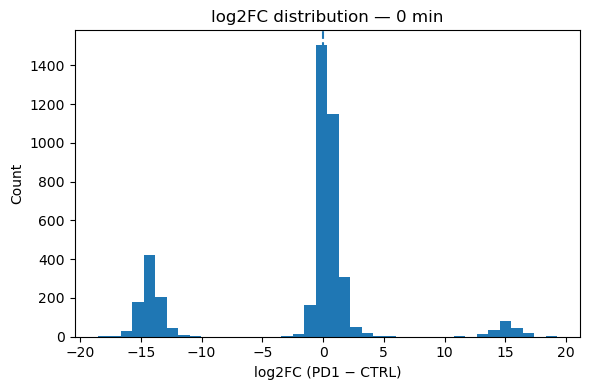

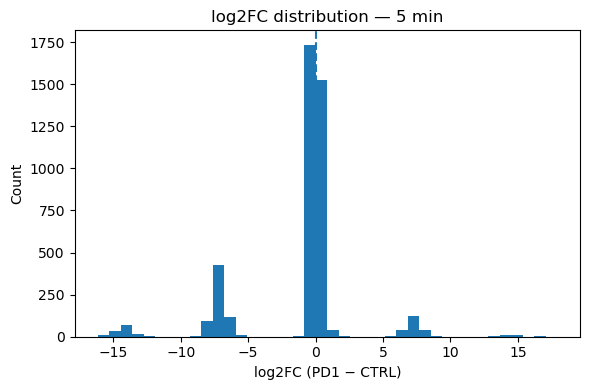

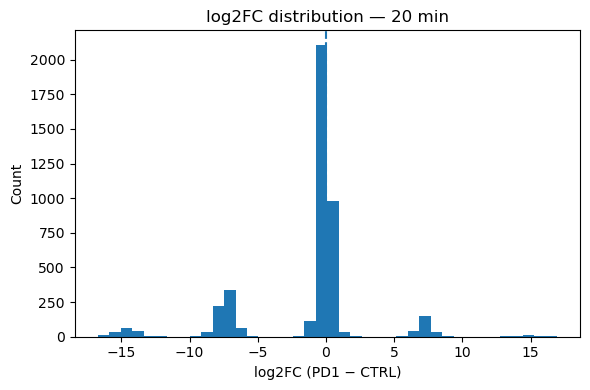

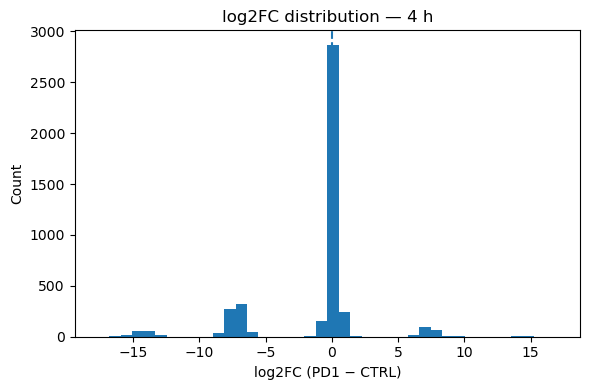

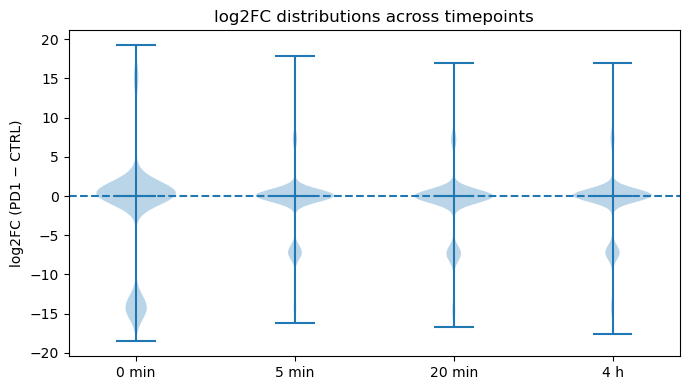

In [10]:
# --- Plot distributions of log2FC (PD1 − CTRL) --------------------------------
# Outputs PNG figures to outputs/figs/ (one histogram per timepoint + a violin plot)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

OUTDIR = Path("outputs")
FIGDIR = OUTDIR / "figs"
FIGDIR.mkdir(exist_ok=True)

# read the aggregated table (CSV mirror of the Excel "All" sheet)
fc = pd.read_csv(OUTDIR / "aggregated_log2FC_by_time.csv")
fc["log2FC_PD1_vs_CTRL"] = pd.to_numeric(fc["log2FC_PD1_vs_CTRL"], errors="coerce")

# ensure a fixed order of timepoints
times = ["0 min", "5 min", "20 min", "4 h"]
fc = fc[fc["time"].isin(times)].copy()

# 1) one histogram per timepoint
for t in times:
    s = fc.loc[fc["time"] == t, "log2FC_PD1_vs_CTRL"].dropna()
    plt.figure(figsize=(6, 4))
    plt.hist(s, bins=40)           # default color, no style set
    plt.axvline(0, linestyle="--") # vertical line at 0
    plt.title(f"log2FC distribution — {t}")
    plt.xlabel("log2FC (PD1 − CTRL)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(FIGDIR / f"fc_hist_{t.replace(' ', '_')}.png", dpi=150)
    plt.show()

# 2) one violin plot for all timepoints
data = [fc.loc[fc["time"] == t, "log2FC_PD1_vs_CTRL"].dropna().values for t in times]
plt.figure(figsize=(7, 4))
plt.violinplot(data, showmedians=True)
plt.xticks(range(1, len(times) + 1), times)
plt.axhline(0, linestyle="--")
plt.ylabel("log2FC (PD1 − CTRL)")
plt.title("log2FC distributions across timepoints")
plt.tight_layout()
plt.savefig(FIGDIR / "fc_violin_all_times.png", dpi=150)
plt.show()


---
### Notes
- The workbook `PD1_TCR_log2FC_annotated_FULL.xlsx` is report-ready (All + per-timepoint sheets, sorted by |log2FC|).
- Sheets: All (all timepoints) + 0_min / 5_min / 20_min / 4_h.
- `aggregated_log2FC_by_time.csv` → CSV mirror of the All sheet (same content).
- `top_up_*.csv` / `top_down_*.csv` → Top changed proteins per timepoint (up / down).
- `enrichment`/`*.csv` (+ optional .png) → Pathway/GO/KEGG enrichment per timepoint & direction. Use Adjusted P-value, Term, and Genes.
- `missingness_by_column.csv` → QC: fraction of missing values per condition column.
- `run_metadata.json` → Run log (mode, id column, row/column counts, paths).
- `proteomics_columns.csv` → Parsed column names (debug only; not needed in report).
- Install `gseapy` to enable enrichment; results will appear under `outputs/enrichment/`.
